# Tutorial Goal

This tutorial aims to show some example of **data analysis and visualization**
from a set of trace events collected trace. These analysis are mainly supported
by **TRAPpy** and other standard **PANDAs** APIs.

In [1]:
import logging
from conf import LisaLogging
LisaLogging.setup()

2017-12-26 13:28:03,927 INFO    : root         : Using LISA logging configuration:
2017-12-26 13:28:03,929 INFO    : root         :   /home/steven/lisa/lisa-github/logging.conf


# Trace Parsing

In [2]:
# Events we are interested to collect from the trace
my_events = [
    "sched_switch",
    "sched_wakeup",
    "sched_contrib_scale_f",
    "sched_load_avg_cpu",
    "sched_load_avg_task",
    "sched_tune_tasks_update",
    "sched_boost_cpu",
    "sched_boost_task",
    "sched_energy_diff",
    "sched_overutilized",
    "cpu_frequency",
    "cpu_capacity"
]

# Let's use an example trace
trace_file = './example_results/trace.dat'

In [3]:
# Use TRAPpy support to convert a trace into a PANDAs DataFrame
import trappy

ftrace = trappy.FTrace(
    name="PandasExamples",
    path=trace_file,
    scope='sched',
    events=my_events,
    window=(0,None))

## Trace visualization

In [4]:
# NOTE: The interactive trace visualization is available only if you run
#       the workload to generate a new trace-file
trappy.plotter.plot_trace(ftrace)

## Accessing DataFrame tables

In [5]:
# Let's have a look at the generated file
!ls -la example_results

total 91244
drwxrwxr-x 1 steven steven       76 12月 26 13:27 .
drwxrwxr-x 1 steven steven      568 12月 26 11:21 ..
-rw-rw-r-- 1 steven steven     1086  8月 22 16:41 platform.json
-rw-rw-r-- 1 steven steven 93429760  8月 22 16:41 trace.dat
drwxrwxr-x 1 steven steven     1294 12月 26 11:20 .trace.dat.cache


Notice that the binary trace has been used to generate both textual
(i.e. trace.txt) trace as well as a raw trace (trace.raw.txt).

In [8]:
logging.info("Example of (formatted) 'sched_switch' event:")
with open('./example_results/trace.txt', 'r') as fh:
    for line in fh:
        if line.find('sched_switch') == -1:
            continue
        print line
        break

2017-12-26 13:39:39,115 INFO    : root         : Example of (formatted) 'sched_switch' event:


           <...>-20278 [001]   713.575552: sched_switch:         trace-cmd:20278 [120] x ==> swapper/1:0 [120]



In [9]:
logging.info("Example of (raw) 'sched_switch' event:")
with open('./example_results/trace.raw.txt', 'r') as fh:
    for line in fh:
        if line.find('sched_switch') == -1:
            continue
        print line
        break

2017-12-26 13:46:48,047 INFO    : root         : Example of (raw) 'sched_switch' event:


           <...>-20278 [001]   713.575552: sched_switch:          prev_comm=trace-cmd prev_pid=20278 prev_prio=120 prev_state=64 next_comm=swapper/1 next_pid=0 next_prio=120



Every event correspond to a "table" which is exposed as an attribute of the
TRAPpy::FTtrace object we created by parsing the trace.

We can use **TRAPpy::FTrace::class_definitions**, which is a dictionary tracking all the collected tables.

In [10]:
logging.info("List of events identified in the trace:")
for event in ftrace.class_definitions.keys():
    logging.info("   %s", event)

2017-12-26 13:47:05,740 INFO    : root         : List of events identified in the trace:
2017-12-26 13:47:05,743 INFO    : root         :    sched_load_avg_task
2017-12-26 13:47:05,745 INFO    : root         :    sched_contrib_scale_factor
2017-12-26 13:47:05,746 INFO    : root         :    ext4_sync_file_enter
2017-12-26 13:47:05,748 INFO    : root         :    tracing_mark_write
2017-12-26 13:47:05,749 INFO    : root         :    cpu_capacity
2017-12-26 13:47:05,751 INFO    : root         :    ext4_da_write_begin
2017-12-26 13:47:05,752 INFO    : root         :    cpu_idle
2017-12-26 13:47:05,753 INFO    : root         :    ext4_sync_file_exit
2017-12-26 13:47:05,755 INFO    : root         :    sched_wakeup_new
2017-12-26 13:47:05,756 INFO    : root         :    f2fs_sync_file_enter
2017-12-26 13:47:05,758 INFO    : root         :    sched_contrib_scale_f
2017-12-26 13:47:05,759 INFO    : root         :    cpu_frequency
2017-12-26 13:47:05,760 INFO    : root         :    sched_boost_

In [11]:
# Let's get a reference to the PANDAs DataFrame corresponding to the
# "sched_switch" events
logging.info("The 'sched_switch' events are collected into this DataFrame:")
df = ftrace.sched_switch.data_frame
df#.head(2)

2017-12-26 13:47:11,532 INFO    : root         : The 'sched_switch' events are collected into this DataFrame:


__comm  __cpu   __line  __pid       next_comm  next_pid  \
Time                                                                         
0.000272            <...>      1       31  20278       swapper/1         0   
0.000348           <idle>      0       36      0              sh     20277   
0.001321            <...>      0       85  20277            sudo     20276   
0.001357           <idle>      1       89      0     rcu_preempt         7   
0.001458      rcu_preempt      1      100      7       swapper/1         0   
0.005202            <...>      0      133  20276  ksdioirqd/mmc2      1364   
0.005349   ksdioirqd/mmc2      0      157   1364        rsyslogd       394   
0.005464           <idle>      1      165      0     ksoftirqd/1        14   
0.005528      ksoftirqd/1      1      180     14     rcu_preempt         7   
0.005612      rcu_preempt      1      205      7       swapper/1         0   
0.005616         rsyslogd      0      207    394   rs:main Q:Reg       380   
0.006245          rs:main      0      218    380            sudo     20276   
0.007334            <...>      0      250  20276       rcu_sched         8   
0.007425           <idle>      1      263      0            bash     19394   
0.007450            <...>      0      265      8       swapper/0         0   
0.008416             bash      1      281  19394     kworker/1:2     19472   
0.008562            <...>      1      301  19472            sshd     15461   
0.009328             sshd      1      341  15461     rcu_preempt         7   
0.009437      rcu_preempt      1      359      7       swapper/1         0   
0.009632           <idle>      0      367      0       rcu_sched         8   
0.009731            <...>      0      378      8       swapper/0         0   
0.013650           <idle>      1      400      0     ksoftirqd/1        14   
0.013727      ksoftirqd/1      1      411     14     rcu_preempt         7   
0.013839      rcu_preempt      1      422      7       swapper/1         0   
0.017585           <idle>      0      465      0  ksdioirqd/mmc2      1364   
0.017587           <idle>      1      466      0     rcu_preempt         7   
0.017681      rcu_preempt      1      477      7       swapper/1         0   
0.017830   ksdioirqd/mmc2      0      483   1364     ksoftirqd/0         3   
0.017886      ksoftirqd/0      0      494      3       rcu_sched         8   
0.017968            <...>      0      505      8       swapper/0         0   
...                   ...    ...      ...    ...             ...       ...   
35.301101            sudo      1  1900971  20990  ksdioirqd/mmc2      1364   
35.301191  ksdioirqd/mmc2      1  1900984   1364            sudo     20990   
35.301333            sudo      1  1900998  20990  ksdioirqd/mmc2      1364   
35.301381  ksdioirqd/mmc2      1  1901008   1364            sudo     20990   
35.301421          <idle>      0  1901012      0     rcu_preempt         7   
35.301516     rcu_preempt      0  1901023      7       swapper/0         0   
35.301782            sudo      1  1901039  20990        rsyslogd       394   
35.302128        rsyslogd      1  1901066    394            sudo     20990   
35.302198          <idle>      0  1901070      0   rs:main Q:Reg       380   
35.302846         rs:main      0  1901081    380       swapper/0         0   
35.303877          <idle>      3  1901098      0            sudo     20991   
35.303987            sudo      1  1901109  20990       swapper/1         0   
35.305325              sh      3  1901131  20991     migration/3        23   
35.305428     migration/3      3  1901149     23       swapper/3         0   
35.305455          <idle>      1  1901153      0            sudo     20991   
35.309369          <idle>      0  1901207      0     rcu_preempt         7   
35.309480     rcu_preempt      0  1901218      7       swapper/0         0   
35.311031              sh      1  1901243  20991            sudo     20990   
35.311063          <idle>      3  1901246

**NOTE:** We can use **head()** to report only a limited number of events

In [12]:
# All events parsed in the trace have an associated DataFrame
logging.info("This is the DataFrame for 'cpu_frequency' events:")
df = ftrace.cpu_frequency.data_frame
df.head(2)

2017-12-26 13:47:16,791 INFO    : root         : This is the DataFrame for 'cpu_frequency' events:


__comm  __cpu  __line  __pid  cpu  frequency
Time                                                        
0.661132  kschedfreq:2      2    3532    119    2    1807000
0.661136  kschedfreq:2      2    3533    119    3    1807000

# Common DataFrame Operations

On DataFrames is possible to execute a number of different operations.
Most commonly we are interested in:
- focus only on certain columns
- filtering events based on different conditions
- joining two or more DataFrames
- resuming statistical data of a DataFrame

## Columns selection

In [13]:
df = ftrace.sched_switch.data_frame
df.head(2)

__comm  __cpu  __line  __pid  next_comm  next_pid  next_prio  \
Time                                                                     
0.000272   <...>      1      31  20278  swapper/1         0        120   
0.000348  <idle>      0      36      0         sh     20277        120   

          prev_comm  prev_pid  prev_prio  prev_state  
Time                                                  
0.000272  trace-cmd     20278        120          64  
0.000348  swapper/0         0        120           0

In [15]:
# The "ix" operator allow to select ranges of [rows:columns]
df = df.ix[:,'next_comm':'prev_state']
df.head(2)

next_comm  next_pid  next_prio  prev_comm  prev_pid  prev_prio  \
Time                                                                       
0.000272  swapper/1         0        120  trace-cmd     20278        120   
0.000348         sh     20277        120  swapper/0         0        120   

          prev_state  
Time                  
0.000272          64  
0.000348           0

In [16]:
# We can also filter by listing the columns we are interested into
tasks = df[['next_pid', 'next_comm']]
logging.info("Found %d sched_switch events: ", len(tasks))
tasks.head(2)

2017-12-26 13:48:30,133 INFO    : root         : Found 130884 sched_switch events: 


next_pid  next_comm
Time                         
0.000272         0  swapper/1
0.000348     20277         sh

In [17]:
# Create a map of {PID: TaskName}
pid_to_task = {int(task[0]): task[1] for task in tasks.drop_duplicates().values}
logging.info("The trace has %s unique PIDs", len(pid_to_task))
pid_to_task

2017-12-26 13:48:50,198 INFO    : root         : The trace has 855 unique PIDs


{0: 'swapper/2',
 1: 'init',
 2: 'kthreadd',
 3: 'ksoftirqd/0',
 6: 'kworker/u8:0',
 7: 'rcu_preempt',
 8: 'rcu_sched',
 10: 'migration/0',
 11: 'watchdog/0',
 12: 'watchdog/1',
 13: 'migration/1',
 14: 'ksoftirqd/1',
 17: 'watchdog/2',
 18: 'migration/2',
 19: 'ksoftirqd/2',
 22: 'watchdog/3',
 23: 'migration/3',
 24: 'ksoftirqd/3',
 31: 'khungtaskd',
 66: 'fsnotify_mark',
 83: 'spi32766',
 88: 'kworker/1:1',
 89: 'kworker/0:1',
 110: 'kworker/u8:3',
 114: 'kworker/0:2',
 118: 'kschedfreq:0',
 119: 'kschedfreq:2',
 122: 'mmcqd/0',
 123: 'mmcqd/0boot0',
 124: 'mmcqd/0boot1',
 125: 'mmcqd/0rpmb',
 128: 'pvr_defer_free',
 129: 'pvr_device_wdg',
 134: 'kworker/3:2',
 136: 'kworker/0:1H',
 138: 'kworker/1:1H',
 166: 'udevd',
 209: 'jbd2/mmcblk0p1-',
 239: 'loop0',
 260: 'jbd2/dm-1-8',
 264: 'kworker/2:1H',
 286: 'kworker/3:1H',
 369: 'rsyslogd',
 380: 'rs:main Q:Reg',
 394: 'rsyslogd',
 395: 'rsyslogd',
 398: 'dbus-daemon',
 489: 'wpa_supplicant',
 492: 'daisydog',
 606: 'tcsd',
 615: 'cha

## Events grouping

In [41]:
# Group events by "PID" and compute 
most_switching = df.groupby('next_pid').describe(include=['object'])
most_switching.head()

next_comm                            prev_comm                      \
             count unique           top  freq     count unique          top   
next_pid                                                                      
0            20400      4     swapper/1  8442     20400    158       chrome   
1              372      1          init   372       372     33  dbus-daemon   
2                5      1      kthreadd     5         5      5    swapper/1   
3              761      1   ksoftirqd/0   761       761     36  rcu_preempt   
6             2275      1  kworker/u8:0  2275      2275     64       chrome   

                
          freq  
next_pid        
0         5964  
1           90  
2            1  
3          246  
6          475

In [42]:
df.groupby('next_pid').get_group(0)

next_comm  next_pid  next_prio       prev_comm  prev_pid  \
Time                                                                  
0.000272   swapper/1         0        120       trace-cmd     20278   
0.001458   swapper/1         0        120     rcu_preempt         7   
0.005612   swapper/1         0        120     rcu_preempt         7   
0.007450   swapper/0         0        120       rcu_sched         8   
0.009437   swapper/1         0        120     rcu_preempt         7   
0.009731   swapper/0         0        120       rcu_sched         8   
0.013839   swapper/1         0        120     rcu_preempt         7   
0.017681   swapper/1         0        120     rcu_preempt         7   
0.017968   swapper/0         0        120       rcu_sched         8   
0.021692   swapper/1         0        120     rcu_preempt         7   
0.025687   swapper/1         0        120     rcu_preempt         7   
0.029661   swapper/1         0        120     rcu_preempt         7   
0.033587   swapper/0         0        120  ksdioirqd/mmc2      1364   
0.033715   swapper/1         0        120     rcu_preempt         7   
0.036768   swapper/1         0        120          chrome     19933   
0.037207   swapper/1         0        120     rcu_preempt         7   
0.041634   swapper/1         0        120     rcu_preempt         7   
0.045588   swapper/0         0        120  ksdioirqd/mmc2      1364   
0.045721   swapper/1         0        120     rcu_preempt         7   
0.049645   swapper/1         0        120     rcu_preempt         7   
0.057555   swapper/0         0        120  ksdioirqd/mmc2      1364   
0.069580   swapper/0         0        120  ksdioirqd/mmc2      1364   
0.081540   swapper/0         0        120  ksdioirqd/mmc2      1364   
0.093541   swapper/0         0        120  ksdioirqd/mmc2      1364   
0.105566   swapper/0         0        120  ksdioirqd/mmc2      1364   
0.117540   swapper/0         0        120  ksdioirqd/mmc2      1364   
0.129542   swapper/0         0        120  ksdioirqd/mmc2      1364   
0.141542   swapper/0         0        120  ksdioirqd/mmc2      1364   
0.153539   swapper/0         0        120  ksdioirqd/mmc2      1364   
0.163033   swapper/1         0        120            sshd     15461   
...              ...       ...        ...             ...       ...   
35.207359  swapper/1         0        120          chrome     20960   
35.217374  swapper/1         0        120  ksdioirqd/mmc2      1364   
35.217487  swapper/1         0        120  ksdioirqd/mmc2      1364   
35.229332  swapper/1         0        120  ksdioirqd/mmc2      1364   
35.229441  swapper/1         0        120  ksdioirqd/mmc2      1364   
35.241395  swapper/1         0        120  ksdioirqd/mmc2      1364   
35.241504  swapper/1         0        120  ksdioirqd/mmc2      1364   
35.245462  swapper/3         0        120     kworker/3:2       134   
35.245836  swapper/0         0        120            bash     19394   
35.253544  swapper/1         0        120  ksdioirqd/mmc2      1364   
35.253837  swapper/1         0        120  ksdioirqd/mmc2      1364   
35.261664  swapper/1         0        120          chrome     20960   
35.262477  swapper/1         0        120          chrome     20960   
35.262982  swapper/1         0        120          chrome     20960   
35.265351  swapper/1         0        120  ksdioirqd/mmc2      1364   
35.265440  swapper/1         0        120  ksdioirqd/mmc2      1364   
35.265704  swapper/3         0        120            bash     20990   
35.266711  swapper/0         0        120            sshd     15461   
35.266822  swapper/3         0        120     migration/3        23   
35.281391  swapper/0         0        120     kworker/0:0     20323   
35.289187  swapper/0         0        120          powerd       649   
35.297534  swapper/0         0        120     rcu_preempt         7   
35.301516  swapper/0         0        120     rcu_preempt         7   
35.302846  swapper/0         0     

In [36]:
most_switching = most_switching.unstack()
most_switching.head()

                  next_pid
next_comm  count  0           20400
                  1             372
                  2               5
                  3             761
                  6            2275
dtype: object

In [48]:
most_switching = most_switching['next_comm']\
                 .sort_values(by=['count'], ascending=False)
most_switching.head()

count unique              top  freq
next_pid                                     
0         20400      4        swapper/1  8442
20552      9224      2  Chrome_IOThread  9223
20527      8309      2           chrome  8307
20560      6898      3           chrome  6797
7          5516      1      rcu_preempt  5516

In [49]:
most_switching_pid  = most_switching.index[1]
most_switching_task = most_switching.values[1][2]
task_name = "{}:{}".format(most_switching_pid, most_switching_task)
logging.info("The second most swithing task is: [%s]", task_name)

2017-12-26 14:45:05,991 INFO    : root         : The second most swithing task is: [20552:Chrome_IOThread]


## Filtering by column value

In [50]:
# Lets use the previous information to filter values of another DataFrame
# Here we use the events reporting the task utilization signal
df = ftrace.sched_load_avg_task.data_frame.ix[:,'comm':'util_sum']
logging.info("Total events: %d", len(df))
df.head()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
2017-12-26 14:46:08,597 INFO    : root         : Total events: 220234


comm  cpu  load_avg  load_sum  period_contrib    pid  util_avg  \
Time                                                                            
0.000014  trace-cmd    1        58   2811439             916  20278        33   
0.000229  trace-cmd    1        59   2820191             111  20278        33   
0.000334         sh    0         0         0             957  20277         0   
0.000982         sh    0         5    285169             710  20277         3   
0.001178         sh    0         5    355825             903  20277         3   

          util_sum  
Time                
0.000014   1601714  
0.000229   1612418  
0.000334         0  
0.000982    164585  
0.001178    205364

In [51]:
# Select only events for the task of interest
select = (df.pid == most_switching_pid)

task_events = df[select]
logging.info("Selected events: %d", len(task_events))
task_events.head()

2017-12-26 14:46:17,222 INFO    : root         : Selected events: 19129


comm  cpu  load_avg  load_sum  period_contrib    pid  \
Time                                                                         
10.277545           chrome    3         5    279939             876  20552   
10.278066  Chrome_IOThread    3         8    421520             374  20552   
10.278226  Chrome_IOThread    3         8    421520             501  20552   
10.279379  Chrome_IOThread    3        15    739012             629  20552   
10.279542  Chrome_IOThread    3        15    739012             765  20552   

           util_avg  util_sum  
Time                           
10.277545         0         0  
10.278066         3    147580  
10.278226         3    147580  
10.279379         9    470942  
10.279542         9    470942

In [52]:
# We can also compose a query using multiple conditions
select = (((task_events.cpu != 1) & (task_events.cpu != 2)) & ~(task_events.util_avg < 450))

task_events = task_events[select]
logging.info("Selected events: %d", len(task_events))
task_events.head()

2017-12-26 14:46:50,060 INFO    : root         : Selected events: 2007


comm  cpu  load_avg  load_sum  period_contrib    pid  \
Time                                                                         
17.112905  Chrome_IOThread    3       989  47260557              91  20552   
17.113017  Chrome_IOThread    3       989  47333261             196  20552   
17.113273  Chrome_IOThread    3       989  47571853             429  20552   
17.113552  Chrome_IOThread    3       989  47866765             717  20552   
17.114018  Chrome_IOThread    3       990  47295142             143  20552   

           util_avg  util_sum  
Time                           
17.112905       452  21592551  
17.113017       452  21592551  
17.113273       452  21831143  
17.113552       452  21831143  
17.114018       456  21817410

## Row selection

In [53]:
# Row selection is also possible, which in our case corresponds to limiting 
# the events on a specified time frame
task_events.ix[21.1:22.9,].head()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


comm  cpu  load_avg  load_sum  period_contrib    pid  \
Time                                                                         
21.983876  Chrome_IOThread    3       860  41072776             117  20552   
21.983908  Chrome_IOThread    3       860  41109640             153  20552   
21.983928  Chrome_IOThread    3       860  41129096             172  20552   
21.983987  Chrome_IOThread    3       860  41188488             230  20552   
21.984067  Chrome_IOThread    3       860  41263240             303  20552   

           util_avg  util_sum  
Time                           
21.983876       452  21610419  
21.983908       452  21610419  
21.983928       452  21629875  
21.983987       452  21629875  
21.984067       452  21704627

## DataFrame Merging

In [54]:
# Let's make use of yet another DataFrame, let's look at the frequencies
frequencies = ftrace.cpu_frequency.data_frame

select = (frequencies.cpu == 0)
frequencies = frequencies.ix[21.1:22.9,'cpu':'frequency'][select]
logging.info("Selected events: %d", len(frequencies))
frequencies.head()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
2017-12-26 14:47:24,373 INFO    : root         : Selected events: 17


cpu  frequency
Time                     
21.215426    0    1001000
21.265745    0    1404000
21.412728    0     507000
21.465761    0    1404000
21.541466    0     507000

In [55]:
# Let's merge the task signal frame with the CPUs frequencies
task_util_and_freq = task_events.join(
    frequencies,
    how='outer',
    lsuffix='lx_')#[['util_avg', 'frequency']]
logging.info("Selected events: %d", len(task_util_and_freq))
task_util_and_freq.tail()

2017-12-26 14:48:43,686 INFO    : root         : Selected events: 2024


comm  cpulx_  load_avg    load_sum  period_contrib  \
Time                                                                       
22.701783  Chrome_IOThread     3.0     893.0  42702053.0           124.0   
22.701807  Chrome_IOThread     3.0     893.0  42727653.0           149.0   
22.701824  Chrome_IOThread     3.0     893.0  42743013.0           164.0   
22.768356              NaN     NaN       NaN         NaN             NaN   
22.818657              NaN     NaN       NaN         NaN             NaN   

               pid  util_avg    util_sum  cpu  frequency  
Time                                                      
22.701783  20552.0     457.0  21865198.0  NaN        NaN  
22.701807  20552.0     457.0  21865198.0  NaN        NaN  
22.701824  20552.0     457.0  21880558.0  NaN        NaN  
22.768356      NaN       NaN         NaN  0.0  1183000.0  
22.818657      NaN       NaN         NaN  0.0  1404000.0

In [56]:
# The new table has the union of events from the two original tables
len(task_events) + len(frequencies)

2024

In [57]:
# Let's propagate missing columns values...
task_util_and_freq = task_util_and_freq.fillna(method='ffill')
task_util_and_freq.tail()

comm  cpulx_  load_avg    load_sum  period_contrib  \
Time                                                                       
22.701783  Chrome_IOThread     3.0     893.0  42702053.0           124.0   
22.701807  Chrome_IOThread     3.0     893.0  42727653.0           149.0   
22.701824  Chrome_IOThread     3.0     893.0  42743013.0           164.0   
22.768356  Chrome_IOThread     3.0     893.0  42743013.0           164.0   
22.818657  Chrome_IOThread     3.0     893.0  42743013.0           164.0   

               pid  util_avg    util_sum  cpu  frequency  
Time                                                      
22.701783  20552.0     457.0  21865198.0  0.0  1404000.0  
22.701807  20552.0     457.0  21865198.0  0.0  1404000.0  
22.701824  20552.0     457.0  21880558.0  0.0  1404000.0  
22.768356  20552.0     457.0  21880558.0  0.0  1183000.0  
22.818657  20552.0     457.0  21880558.0  0.0  1404000.0

In [226]:
# NOTE: missing values at the beginning can be fixe as well
#       ...but that behind that demo!
# LISA has a set of methods which provides a complete and realiable solutions
# to do this kind of compositions on data frames

# Plotting

## Using pylab

In [58]:
# Enable generation of Notebook emebedded plots
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['select']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


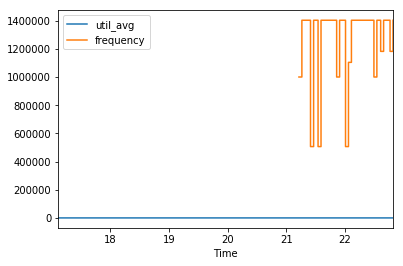

In [59]:
task_util_and_freq[['util_avg', 'frequency']].plot(drawstyle="steps-post")

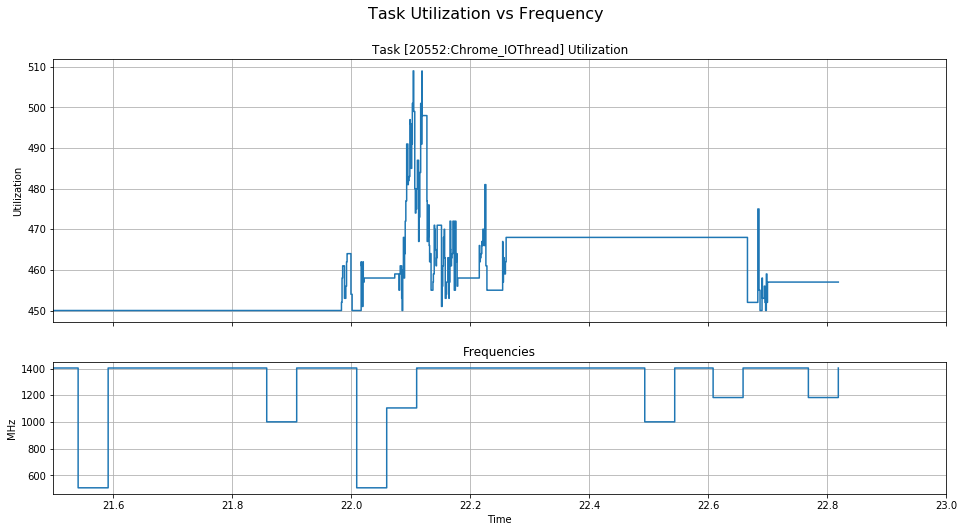

In [60]:
import matplotlib.gridspec as gridspec

t_min = 21.5
t_max = 23.0

gs = gridspec.GridSpec(2, 1, height_ratios=[2,1]);

plt.figure(figsize=(16, 8));
plt.suptitle("Task Utilization vs Frequency",
             y=.97, fontsize=16, horizontalalignment='center');

# Plot Utilization
data = task_util_and_freq['util_avg']
axes = plt.subplot(gs[0,0]);
data.plot(ax=axes, drawstyle='steps-post');
axes.set_title('Task [{}] Utilization'.format(task_name));
axes.set_ylabel('Utilization')
axes.set_xlim(t_min, t_max);
axes.grid(True);
axes.set_xticklabels([])
axes.set_xlabel('')


# Plot Frequencies
data = task_util_and_freq['frequency']/1000
axes = plt.subplot(gs[1,0]);
data.plot(ax=axes, drawstyle='steps-post');
axes.set_title('Frequencies');
axes.set_ylabel('MHz')
axes.set_xlim(t_min, t_max);
axes.grid(True);

Plots can be much better with just a little bit of setup and using the proper APIs.<br>
That's why **LISA** aims at providing a **predefined set of plot functions** for commonly used analysis.

## Using TRAPpy LinePlotter

In [61]:
# Consider the data frame for the frequency switching events
logging.info("Table for 'cpu_frequency' events:")
ftrace.cpu_frequency.data_frame.head(1)

2017-12-26 14:52:48,910 INFO    : root         : Table for 'cpu_frequency' events:


__comm  __cpu  __line  __pid  cpu  frequency
Time                                                        
0.661132  kschedfreq:2      2    3532    119    2    1807000

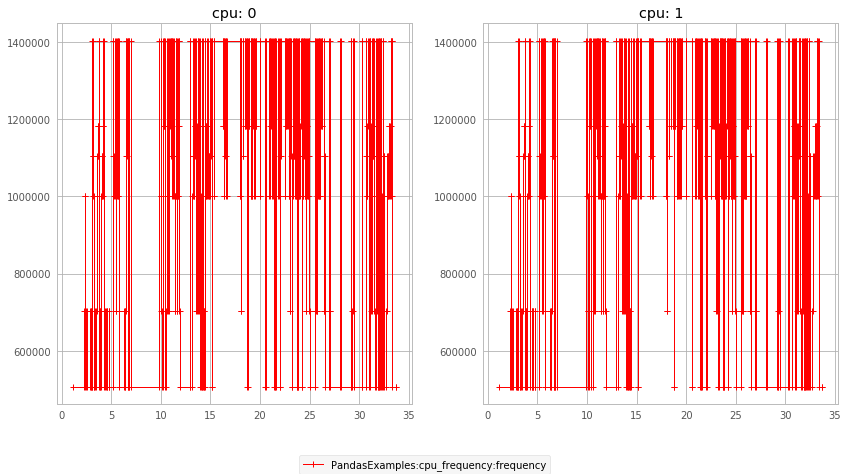

In [62]:
# It is possible to mix in the same plot multiple events

# The LinePlot module requires to specify a list of signals to plot.
# Each signal is defined as:
#       <event>:<column>
# where:
#  <event>   is one of the events collected from the trace by the FTrace object
#  <column>  is one of the column of the previously defined event
my_signals = [
    'cpu_frequency:frequency',
]

# These two paramatere are passed to the LinePlot call as long with the
# TRAPpy FTrace object
trappy.LinePlot(
    
    # FTrace object
    ftrace,
    
    # Signals to be plotted
    signals=my_signals,
    
    # Generate one plot for each value of the specified column
    pivot='cpu',
    
    # Generate only plots which satisfy these filters
    filters = {
        # Column
        # |     Values
        # |     |
        'cpu' : [0, 1]
    },
    
    # Formatting style
    drawstyle='steps-post',
    marker = '+'

).view()

## Using TRAPpy Interactive LinePlotter

In [63]:
# We can also produce interacive plots
trappy.ILinePlot(
    ftrace,                         # TRAPpy RUN object
    signals=[
      'cpu_frequency:frequency'
    ],
    drawstyle='steps-post',
    per_line=1,
#     sync_zoom=True,
#     group='UtilVsFrequency',
    marker = '+').view()

trappy.ILinePlot(
    ftrace,                         # TRAPpy RUN object
    signals=[
      'sched_load_avg_task:util_avg'
    ],
    filters={
        'pid': [most_switching_pid]
    },
    drawstyle='steps-post',
    per_line=1,
#     sync_zoom=True,
#     group='UtilVsFrequency',
    marker = '+').view()

You can find much more exaples of plotting in TRAPpy on the example
notebook available on the GitHub:<br>
    https://github.com/ARM-software/trappy/blob/master/doc/Plotter.ipynb

## Data aggregation and analysis

In [64]:
df = ftrace.cpu_frequency.data_frame
df.head()

__comm  __cpu  __line  __pid  cpu  frequency
Time                                                        
0.661132  kschedfreq:2      2    3532    119    2    1807000
0.661136  kschedfreq:2      2    3533    119    3    1807000
0.712896  kschedfreq:2      2    4282    119    2     507000
0.712905  kschedfreq:2      2    4283    119    3     507000
1.186210         <...>      0    9431  20289    0     507000

In [65]:
# Lets compute the residency on each OPP
df.loc[:,'start'] = df.index
df.loc[:,'delta'] = (df['start'] - df['start'].shift()).fillna(0).shift(-1)
df.head()

__comm  __cpu  __line  __pid  cpu  frequency     start  \
Time                                                                     
0.661132  kschedfreq:2      2    3532    119    2    1807000  0.661132   
0.661136  kschedfreq:2      2    3533    119    3    1807000  0.661136   
0.712896  kschedfreq:2      2    4282    119    2     507000  0.712896   
0.712905  kschedfreq:2      2    4283    119    3     507000  0.712905   
1.186210         <...>      0    9431  20289    0     507000  1.186210   

             delta  
Time                
0.661132  0.000004  
0.661136  0.051760  
0.712896  0.000009  
0.712905  0.473305  
1.186210  0.000252

In [66]:
import pandas as pd

# Now we can get group by frequency and sum the partional residency times
freq_residencies = df.groupby('frequency')['delta'].sum()
logging.info("Residency time per OPP:")
df = pd.DataFrame(freq_residencies)
df

2017-12-26 14:53:34,508 INFO    : root         : Residency time per OPP:


delta
frequency           
507000     11.141186
702000      1.832051
1001000     2.810101
1105000     1.160819
1183000     1.321498
1209000     2.794528
1404000     9.991687
1612000     0.506026
1807000     2.727041

In [67]:
# Compute the relative residency time
tot = sum(freq_residencies)
#df = df.apply(lambda delta : 100*delta/tot)
for f in freq_residencies.index:
    logging.info("Freq %10dHz : %5.1f%%", f, 100*freq_residencies[f]/tot)

2017-12-26 14:55:18,267 INFO    : root         : Freq     507000Hz :  32.5%
2017-12-26 14:55:18,269 INFO    : root         : Freq     702000Hz :   5.3%
2017-12-26 14:55:18,270 INFO    : root         : Freq    1001000Hz :   8.2%
2017-12-26 14:55:18,271 INFO    : root         : Freq    1105000Hz :   3.4%
2017-12-26 14:55:18,272 INFO    : root         : Freq    1183000Hz :   3.9%
2017-12-26 14:55:18,274 INFO    : root         : Freq    1209000Hz :   8.2%
2017-12-26 14:55:18,275 INFO    : root         : Freq    1404000Hz :  29.1%
2017-12-26 14:55:18,276 INFO    : root         : Freq    1612000Hz :   1.5%
2017-12-26 14:55:18,278 INFO    : root         : Freq    1807000Hz :   8.0%


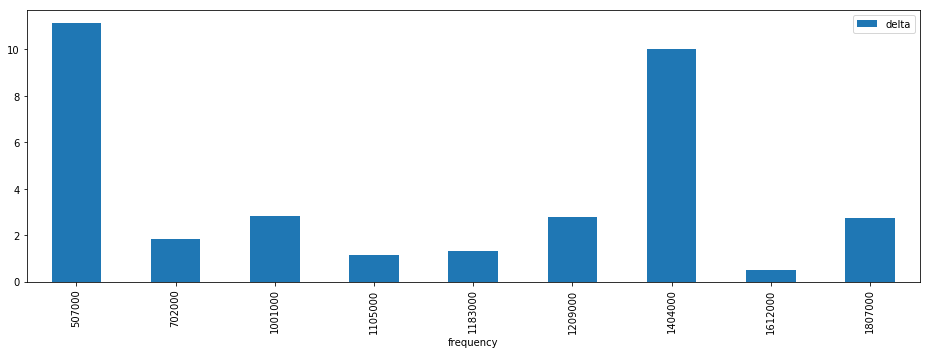

In [72]:
# Plot residency time
fig, axes = plt.subplots(1, 1, figsize=(16, 5));
df.plot(kind='bar', ax=axes)